<a id='content'></a>
<br><b>Содержание</b>
<br><b>1. [Введение](#p1)</b>
<br><b>2. [Импорт библиотек. Выгрузка данных](#p1)</b>
<br><b>2.1. [Регион 0](#2.1_reg0)
<br><b>2.2. [Регион 1](#2.2_reg1)
<br><b>2.3. [Регион 2](#2.3_reg2)
<br><b>3. [Подготовка и обучение модели. Оценка метрик](#3_ml)</b>
<br><b>4. [Подготовка данных для расчета прибыли](#4_prep_prof)</b>
<br><b>5. [Bootstrap](#5_bootstrap)</b>

<a id='p1'></a>
<h1>1. Введение</h1>

По предоставленным пробам нефти в трёх регионах, характеристики для каждой скважины в которых уже известны, требуется построить модель для выбора региона, где добыча принесёт наибольшую прибыль. 
Так же требуется оценить возможную прибыль и риски техников Bootstrap.

<a id='p1'></a>
<h1>2. Импорт библиотек. Выгрузка данных</h1>

[Содержание](#content)

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
data_0 = pd.read_csv('geo_data_0.csv')
data_1 = pd.read_csv('geo_data_1.csv')
data_2 = pd.read_csv('geo_data_2.csv')

Построим гистограммы для каждого из столбцов.

Создадим функцию для построения однотипных графиков по каждому из регионов

In [8]:
def graph(data):
    fig = plt.figure()
    fig.set_figwidth(16)
    fig.set_figheight(10)

    ax = fig.add_subplot(211)
    ax.hist(data['f0'], histtype='step', linewidth=2, label='f0')
    ax.hist(data['f1'], histtype='step', linewidth=2, label='f1')
    ax.hist(data['f2'], histtype='step', linewidth=2, label='f2')
    ax.legend(fontsize='xx-large')

    ax1 = fig.add_subplot(212)
    _ = ax1.hist(data['product'], density=True, bins=30)

<a id='2.1_reg0'></a>
<h3>2.1 Регион 0</h3>

[Содержание](#content)

In [4]:
data_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


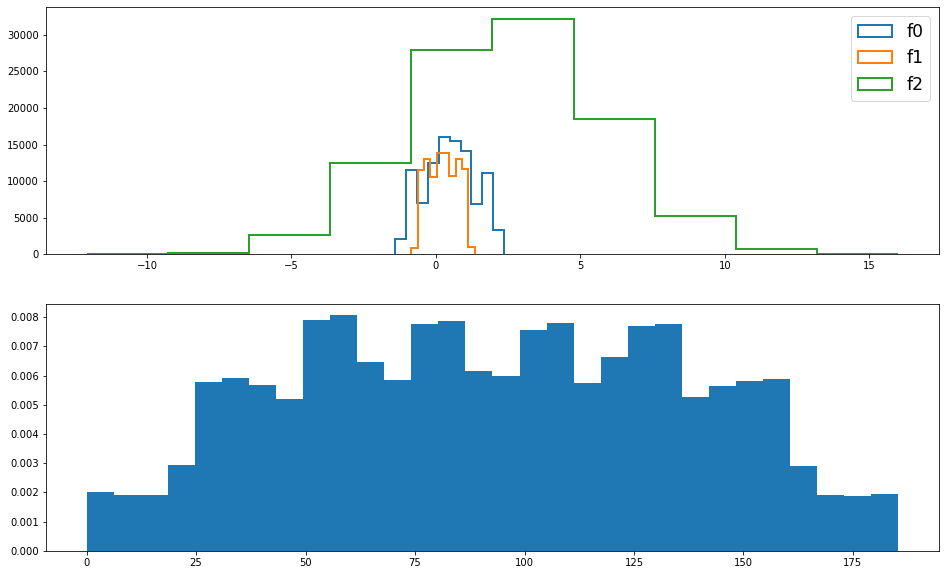

In [11]:
graph(data_0)

<a id='2.2_reg1'></a>
<h3>2.2 Регион 1</h3>

[Содержание](#content)

In [5]:
data_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


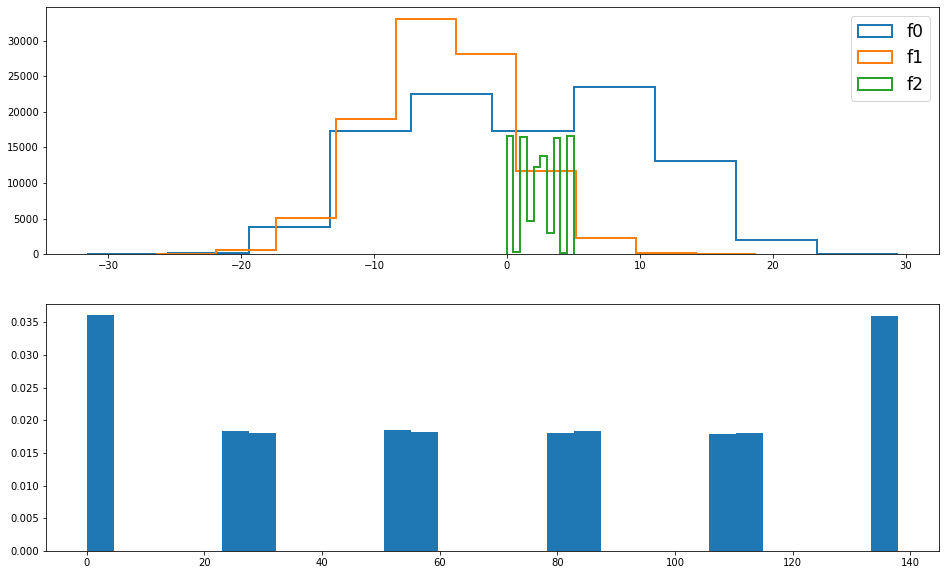

In [9]:
graph(data_1)

<a id='2.3_reg2'></a>
<h3>2.3 Регион 2</h3>

[Содержание](#content)

In [7]:
data_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


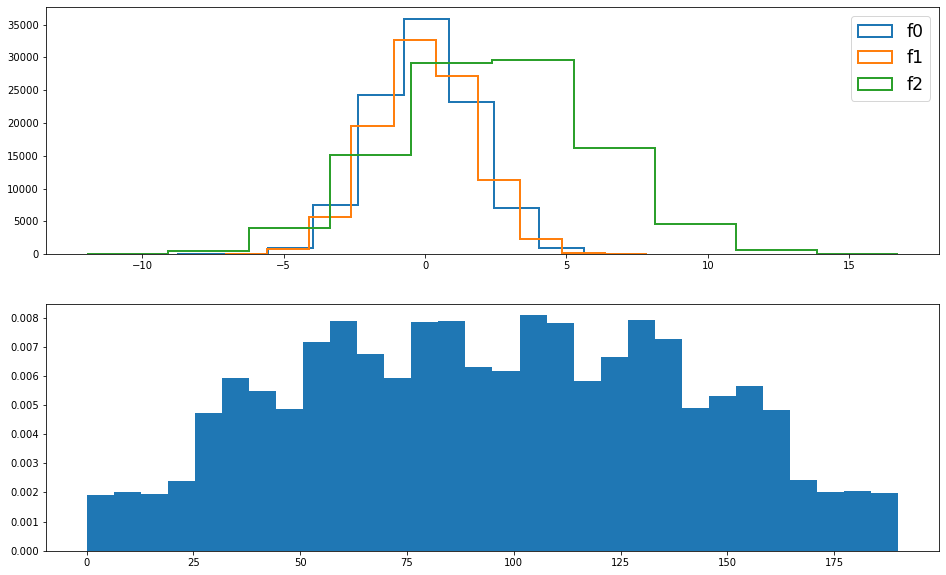

In [10]:
graph(data_2)

<a id='3_ml'></a>
<h1>3. Обучение модели. Оценка метрик</h1>

[Содержание](#content)

Что бы не повторять однотипный код и избежать возможных ошибок при его повторе, создадим функцию для выделения обучающей и валидационной выборок, обучения моделей и получения предсказаний.

In [9]:
def get_predict_target(data):
    target = data['product']
    features = data.drop(['product', 'id'], axis=1)
    features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=.25, random_state=8323)
    model = LinearRegression()
    model.fit(features, target)
    return pd.Series(model.predict(features_valid), index=target_valid.index), target_valid

In [10]:
prediction_0, target_valid_0 = get_predict_target(data_0)
print('Регион 0')
print('Ошибка RMSE:', mean_squared_error(prediction_0, target_valid_0) ** .5)
print('Средний запас предсказанног сырья:', prediction_0.mean())

Регион 0
Ошибка RMSE: 37.823218244522856
Средний запас предсказанног сырья: 92.56316536026188


In [11]:
prediction_1, target_valid_1 = get_predict_target(data_1)

print('Регион 1')
print('Ошибка RMSE:', mean_squared_error(prediction_1, target_valid_1) ** .5)
print('Средний запас предсказанног сырья:', prediction_1.mean())

Регион 1
Ошибка RMSE: 0.8934919485235134
Средний запас предсказанног сырья: 68.7353687032232


In [12]:
prediction_2, target_valid_2 = get_predict_target(data_2)

print('Регион 2')
print('Ошибка RMSE:', mean_squared_error(prediction_2, target_valid_2) ** .5)
print('Средний запас предсказанног сырья:', prediction_2.mean())

Регион 2
Ошибка RMSE: 39.82913787126493
Средний запас предсказанног сырья: 95.13137461772324


In [13]:
pd.concat([target_valid_0, target_valid_1, target_valid_2], axis=1).describe()

,product,product,product
count,25000.000000,25000.000000,25000.000000
mean,93.018415,68.729339,95.303394
std,44.374654,45.946736,44.413784
min,0.000000,0.000000,0.023608
25%,56.537036,26.953261,60.023552
50%,93.448480,57.085625,95.384342
75%,129.235270,107.813044,130.571507
max,185.362690,137.945408,190.013589


In [14]:
pd.concat([prediction_0, prediction_1, prediction_2], axis=1).describe()

,0,1,2
count,25000.000000,25000.000000,25000.000000
mean,92.563165,68.735369,95.131375
std,23.302514,45.937693,19.975962
min,-9.884474,-1.886341,11.976569
25%,76.630112,28.509735,81.590296
50%,92.624784,58.020241,95.021118
75%,108.371209,109.294531,108.488998
max,180.386068,139.900372,176.829066


Текущие выводы:
- Предсказания по региону 2 имеют наименьшую ошибку. Очень близкую к нулю.
- В тоже время, в отличии от регионов 0 и 2, здесь существенной ниже значение максимального запаса одной из скважин, а также низкий уровень запасов скважин в первых двух квартилях. Судя по графикам, регион 1 имеет иное распределение запасов нефти по скважинам.
- Распределение запасов по скважинам регионов 0 и 2 похожи между собой.

<a id = '4_prep_prof'></a>
    
<h1>4. Подготовка данных для расчета прибыли</h1>
    
[Содержание](#content)

Константы для дальнейших расчетов

In [15]:
BUDGET = 10000000000
SOME_500 = 500
BEST_200 = 200
PROFIT_BY_BARREL = 450000

Суммарный запас нефти в разрабатываемых скважинах в регионе, для безубыточного результата

In [16]:
min_prod_region = BUDGET // PROFIT_BY_BARREL
min_prod_region

22222

Так как, согласно методике заказчика, для разработки в регионе отбирают 200 скважин, то минимальный средний запас нефти для каждой из скважин можно рассчитать так:

In [17]:
min_product = BUDGET // PROFIT_BY_BARREL // BEST_200
min_product

111

In [18]:
pd.concat([prediction_0, prediction_1, prediction_2], axis=1).describe()

,0,1,2
count,25000.000000,25000.000000,25000.000000
mean,92.563165,68.735369,95.131375
std,23.302514,45.937693,19.975962
min,-9.884474,-1.886341,11.976569
25%,76.630112,28.509735,81.590296
50%,92.624784,58.020241,95.021118
75%,108.371209,109.294531,108.488998
max,180.386068,139.900372,176.829066


Средний запас по каждому из регионов ниже полученного значения. Примерно 25% скважин в каждом из регионов содержат достаточный для безубыточной работы запас нефти. 

<a id='profit_calc'></a>
Функция расчета суммарной прибыли региона

In [48]:
def profit_calc(predict, data):
    best_indexes = predict.sort_values(ascending=False).head(BEST_200)
    best_for_profit = data.loc[best_indexes.index]['product'].sum()
    return int((best_for_profit * PROFIT_BY_BARREL - BUDGET) / 1000000)

In [49]:
print('Расчетная прибыль в наилучшем случае Региона 0, млн. руб.:', profit_calc(prediction_0, data_0))
print('Расчетная прибыль в наилучшем случае Региона 1, млн. руб.:', profit_calc(prediction_1, data_1))
print('Расчетная прибыль в наилучшем случае Региона 2, млн. руб.:', profit_calc(prediction_2, data_2))

Расчетная прибыль в наилучшем случае Региона 0, млн. руб.: 3245
Расчетная прибыль в наилучшем случае Региона 1, млн. руб.: 2415
Расчетная прибыль в наилучшем случае Региона 2, млн. руб.: 2395


<a id = '5_bootstrap'></a>
    
<h1>5. Bootstrap</h1>
    
[Содержание](#content)

Функция для генерации 1000 выборок и расчета прибыли региона исходя из каждой из этих выборок.

In [50]:
def get_sample_profit(pred, data):
    state = np.random.RandomState(8323)
    sample = []
    for i in range(1000):
        prob = pred.sample(n=SOME_500, random_state=state, replace=True)
        sample.append(profit_calc(prob, data))
    return sample

По каждому из регионов методом bootstrap рассчитаем среднюю выручку, доверительный интервал и вероятность убытков. Вероятность убытков определим, как доля выборок, среднее значение которых оказалось отрицательным.

In [53]:
i = 0

for data, pred in zip([data_0, data_1, data_2], [prediction_0, prediction_1, prediction_2]):
    sample = get_sample_profit(pred, data)
    sample = pd.Series(sample)
    print('='*50)
    print('Регион', i)
    i += 1
    print('Средняя выручка:', sample.mean())
    print('Доверительный интервал:', round(sample.quantile(.025)), round(sample.quantile(.975)))
    loss = sample[sample < 0]
    loss = loss.count() * 100 / sample.count()
    print('Вероятность убытков:', loss)

Регион 0
Средняя выручка: 454.631
Доверительный интервал: -55 965
Вероятность убытков: 4.4
Регион 1
Средняя выручка: 442.6
Доверительный интервал: 68 831
Вероятность убытков: 1.4
Регион 2
Средняя выручка: 349.572
Доверительный интервал: -199 865
Вероятность убытков: 10.4


Средняя выручка по методу bootstrap оказалась на порядок ниже максимально возможной в каждом из регионов. Что естественно.

Исходя из полученных значений, для далнейшей разработки предлагается Регион 1. Так как вероятность убытков составил всего 1.4%.